In [0]:
import pyspark


In [0]:
from pyspark.context import SparkContext

##CREATING RDDS

In [0]:
sc=SparkContext.getOrCreate() 

In [0]:
data=sc.textFile('/FileStore/tables/train.csv') 

In [0]:
data.cache()

Out[5]: /FileStore/tables/train.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [0]:
df=sc.parallelize('/FileStore/tables/train.csv') 

In [0]:
data.collect()

Out[7]: ['Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales',
 'FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138',
 'DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228',
 'FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27',
 'FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38',
 'NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052',
 'FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088',
 'FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528',
 'FDP10,,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3

In [0]:
data.cache()

Out[8]: /FileStore/tables/train.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

#TRANSFORMATION

In [0]:
str_re=data.map(lambda x: x.replace(',',''))

In [0]:
str_re.collect()

Out[10]: ['Item_IdentifierItem_WeightItem_Fat_ContentItem_VisibilityItem_TypeItem_MRPOutlet_IdentifierOutlet_Establishment_YearOutlet_SizeOutlet_Location_TypeOutlet_TypeItem_Outlet_Sales',
 'FDA159.3Low Fat0.016047301Dairy249.8092OUT0491999MediumTier 1Supermarket Type13735.138',
 'DRC015.92Regular0.019278216Soft Drinks48.2692OUT0182009MediumTier 3Supermarket Type2443.4228',
 'FDN1517.5Low Fat0.016760075Meat141.618OUT0491999MediumTier 1Supermarket Type12097.27',
 'FDX0719.2Regular0Fruits and Vegetables182.095OUT0101998Tier 3Grocery Store732.38',
 'NCD198.93Low Fat0Household53.8614OUT0131987HighTier 3Supermarket Type1994.7052',
 'FDP3610.395Regular0Baking Goods51.4008OUT0182009MediumTier 3Supermarket Type2556.6088',
 'FDO1013.65Regular0.012741089Snack Foods57.6588OUT0131987HighTier 3Supermarket Type1343.5528',
 'FDP10Low Fat0.127469857Snack Foods107.7622OUT0271985MediumTier 3Supermarket Type34022.7636',
 'FDH1716.2Regular0.016687114Frozen Foods96.9726OUT0452002Tier 2Supermarket Type11076

In [0]:
data.count()

Out[11]: 8524

In [0]:
data.take(10)

Out[12]: ['Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales',
 'FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138',
 'DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228',
 'FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27',
 'FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38',
 'NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052',
 'FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088',
 'FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528',
 'FDP10,,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type

In [0]:
find_supermarket=data.filter(lambda x: 'Grocery Store' in x)

In [0]:
find_supermarket.collect()

Out[14]: ['FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38',
 'FDC37,,Low Fat,0.057556998,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876',
 'FDE51,5.925,Regular,0.161466534,Dairy,45.5086,OUT010,1998,,Tier 3,Grocery Store,178.4344',
 'FDC14,,Regular,0.072221801,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362',
 'FDV38,19.25,Low Fat,0.170348551,Dairy,55.7956,OUT010,1998,,Tier 3,Grocery Store,163.7868',
 'FDM39,6.42,LF,0.089498926,Dairy,178.1002,OUT010,1998,,Tier 3,Grocery Store,358.2004',
 'FDS02,,Regular,0.255394896,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176',
 'FDI26,,Low Fat,0.061082177,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.172',
 'FDY40,,Regular,0.15028599,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076',
 'FDC46,17.7,LF,0.195068226,Snack Foods,185.4266,OUT010,1998,,Tier 3,Grocery Store,184.4266',
 'FDN48,,Low Fat,0.113720344,Baking Goods,89.

In [0]:
find_supermarket.count()

Out[15]: 1083

In [0]:
Count_Of_Total_Rdds=data.filter(lambda t: "Item_Identifier" not in t)

In [0]:
Count_Of_Total_Rdds.count() # This line is showing that we have 8523 RDD's.

Out[17]: 8523

d
#SHARED VARIABLE

In [0]:
count1=sc.accumulator(0)
count2=sc.accumulator(0)
fat=sc.broadcast('Low Fat')
fat1=sc.broadcast('Regular Fat')

In [0]:
def count_fat(data):
    global count1
    global count2
    if fat.value in data:
        count1+=1
    if fat1.value in data:
        count2+=1
    
count_Data=data.map(count_fat)
#count_Data.count()
print(count1,count2)

0 0


In [0]:

from pyspark.sql import SparkSession

In [0]:
from pyspark.sql import SQLContext

#SPARK SQL

In [0]:

df=spark.read.option('header','true').csv('/FileStore/tables/train.csv')

In [0]:
df.show(5) 

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|           OUT018|                     2009|     Medium|              Tier 3|Superma

In [0]:
df.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: string (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Item_Visibility: string (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: string (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: string (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: string (nullable = true)



In [0]:
df.describe()

Out[25]: DataFrame[summary: string, Item_Identifier: string, Item_Weight: string, Item_Fat_Content: string, Item_Visibility: string, Item_Type: string, Item_MRP: string, Outlet_Identifier: string, Outlet_Establishment_Year: string, Outlet_Size: string, Outlet_Location_Type: string, Outlet_Type: string, Item_Outlet_Sales: string]

In [0]:
df.registerTempTable("store")

/databricks/spark/python/pyspark/sql/dataframe.py:234: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [0]:
view=spark.sql('select * from store')

In [0]:
view.show()

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|           OUT018|                     2009|     Medium|              Tier 3|Superma

In [0]:
unique=spark.sql('SELECT COUNT (DISTINCT(*)) FROM store')

In [0]:
unique.show()# WE HAVE 4650

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|count(DISTINCT Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales)|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                                                 4650|
+---------------------------------------------------------------------------------------------------------------------------------------

In [0]:
outlet=spark.sql("SELECT Outlet_Size, COUNT(Outlet_Size) FROM store GROUP BY Outlet_Size")

In [0]:
outlet.show()

+-----------+------------------+
|Outlet_Size|count(Outlet_Size)|
+-----------+------------------+
|       High|               932|
|       null|                 0|
|     Medium|              2793|
|      Small|              2388|
+-----------+------------------+



In [0]:
item=spark.sql("SELECT Item_Type, COUNT(Item_Type) FROM store GROUP BY Item_Type")

In [0]:
item.show()

+--------------------+----------------+
|           Item_Type|count(Item_Type)|
+--------------------+----------------+
|       Starchy Foods|             148|
|        Baking Goods|             648|
|              Breads|             251|
|Fruits and Vegeta...|            1232|
|                Meat|             425|
|         Hard Drinks|             214|
|         Soft Drinks|             445|
|           Household|             910|
|           Breakfast|             110|
|               Dairy|             682|
|         Snack Foods|            1200|
|              Others|             169|
|             Seafood|              64|
|              Canned|             649|
|        Frozen Foods|             856|
|  Health and Hygiene|             520|
+--------------------+----------------+



In [0]:

Total_Sales=spark.sql("select sum(Item_Outlet_Sales) as Total_Sales from store")

In [0]:
Total_Sales.show()

+--------------------+
|         Total_Sales|
+--------------------+
|1.8591125410400037E7|
+--------------------+



#PANDAS

In [0]:
df1=df.toPandas()

In [0]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].map({'Low Fat':'LOW FAT','Regular':'REGULAR','low fat':'LOW FAT','LF':'LOW FAT','reg':'REGULAR'})

In [0]:

print('UNIQUE VALUES = ',df1['Item_Fat_Content'].unique())

print('-------------------------')

print(df1.isnull().sum())

UNIQUE VALUES =  ['LOW FAT' 'REGULAR']
-------------------------
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [0]:
df1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
unique,1559,415,2,7880,16,5938,10,9,3,3,4,3493
top,FDW13,12.15,LOW FAT,0,Fruits and Vegetables,172.0422,OUT027,1985,Medium,Tier 3,Supermarket Type1,958.752
freq,10,86,5517,526,1232,7,935,1463,2793,3350,5577,17


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item_Identifier            8523 non-null   object
 1   Item_Weight                7060 non-null   object
 2   Item_Fat_Content           8523 non-null   object
 3   Item_Visibility            8523 non-null   object
 4   Item_Type                  8523 non-null   object
 5   Item_MRP                   8523 non-null   object
 6   Outlet_Identifier          8523 non-null   object
 7   Outlet_Establishment_Year  8523 non-null   object
 8   Outlet_Size                6113 non-null   object
 9   Outlet_Location_Type       8523 non-null   object
 10  Outlet_Type                8523 non-null   object
 11  Item_Outlet_Sales          8523 non-null   object
dtypes: object(12)
memory usage: 799.2+ KB


In [0]:
df1['Outlet_Size'].dropna()



Out[42]: 0       Medium
1       Medium
2       Medium
4         High
5       Medium
         ...  
8517     Small
8518      High
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 6113, dtype: object

In [0]:
df1.isnull().sum()

Out[43]: Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,LOW FAT,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,REGULAR,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,LOW FAT,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,REGULAR,0,Fruits and Vegetables,182.095,OUT010,1998,None,Tier 3,Grocery Store,732.38
4,NCD19,8.93,LOW FAT,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LOW FAT,0.056783389,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,REGULAR,0.046982429,Baking Goods,108.157,OUT045,2002,None,Tier 2,Supermarket Type1,549.285
8520,NCJ29,10.6,LOW FAT,0.035186271,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,REGULAR,0.145220646,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

##CHECKING NULL VALUES

Out[46]: <AxesSubplot:>

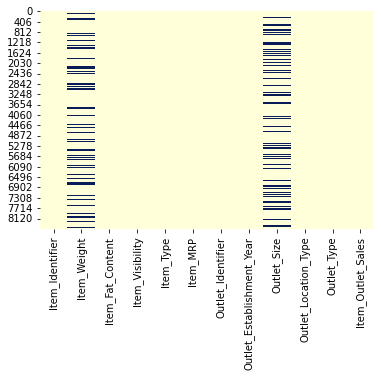

In [0]:

sns.heatmap(df1.isnull(), cbar=False, cmap="YlGnBu") # AS YOU CAN SEE ALL VALUES HAS BEEN DROPPED

#EXPLORATORY DATA ANALYSIS

In [0]:
df1.groupby('Item_Fat_Content', as_index=False)['Item_Identifier'].count()

,Item_Fat_Content,Item_Identifier
0,LOW FAT,5517
1,REGULAR,3006


Out[48]: <AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

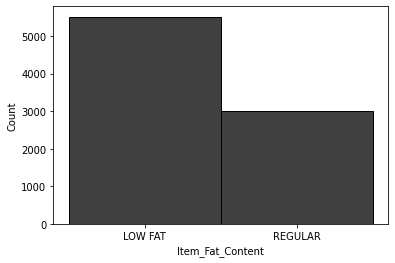

In [0]:
sns.histplot(data=df1['Item_Fat_Content'],color='black')

In [0]:
df1['Item_Outlet_Sales']=df1['Item_Outlet_Sales'].astype('float64')


In [0]:
df1['Item_Outlet_Sales']=df1['Item_Outlet_Sales'].astype('int')

In [0]:
import pandas as pd

TOTAL SALES :                   Item_Outlet_Sales
Item_Fat_Content                   
LOW FAT                    11901328
REGULAR                     6685516
-----------------------SALES PER YEAR ----------------------------
Out[52]: array([<AxesSubplot:xlabel='Outlet_Establishment_Year'>,
       <AxesSubplot:xlabel='Outlet_Establishment_Year'>], dtype=object)

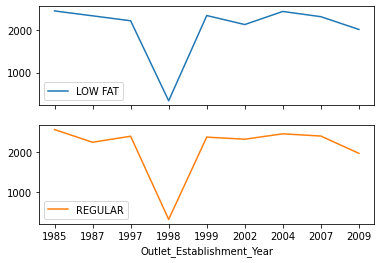

In [0]:
# CHECKING THE SALES OF EACH ITEM_FAT_CONTENT
print('TOTAL SALES :',df1[['Item_Fat_Content','Item_Outlet_Sales']].groupby('Item_Fat_Content').aggregate({'Item_Outlet_Sales':'sum'}))

print('-----------------------SALES PER YEAR ----------------------------')

pd.pivot_table(df1.reset_index(),index=df1['Outlet_Establishment_Year'], columns=df1['Item_Fat_Content'], values='Item_Outlet_Sales').plot(subplots=True)


Out[53]: <AxesSubplot:>

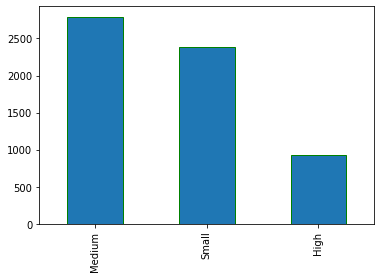

In [0]:
#COUNT THE STORE TYPE
df1['Outlet_Size'].value_counts().plot(kind='bar',edgecolor='green')

Out[54]: <AxesSubplot:>

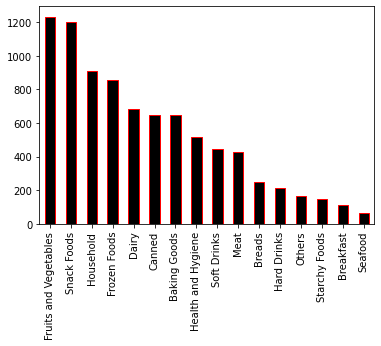

In [0]:
# COUNT THE PRODUCTS
df1['Item_Type'].value_counts().plot(kind='bar',edgecolor='red',color='black')

In [0]:
df1['Item_Outlet_Sales']=df1['Item_Outlet_Sales'].astype('float')

In [0]:
df1['Item_Outlet_Sales']=df1['Item_Outlet_Sales'].astype('int')

In [0]:
#REVENUE GENERATED BY EACH ITEM
df1[['Item_Type','Item_Outlet_Sales']].groupby('Item_Type').aggregate({'Item_Outlet_Sales':'sum'}) 

,Item_Outlet_Sales
Item_Type,
Baking Goods,1265198
Breads,553105
Breakfast,232245
Canned,1443824
Dairy,1522268
Frozen Foods,1825296
Fruits and Vegetables,2819435
Hard Drinks,457685
Health and Hygiene,1044938


In [0]:
#REVENUE GENERATED BY EACH OUTLET
df1[['Outlet_Size','Item_Outlet_Sales']].groupby('Outlet_Size').aggregate({'Item_Outlet_Sales':'sum'}) 

,Item_Outlet_Sales
Outlet_Size,
High,2142201
Medium,7488298
Small,4565014


/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[59]: <AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

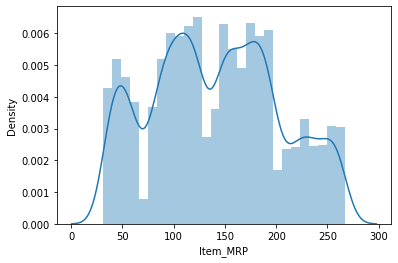

In [0]:
 sns.distplot(df1['Item_MRP'])

Out[60]: <AxesSubplot:>

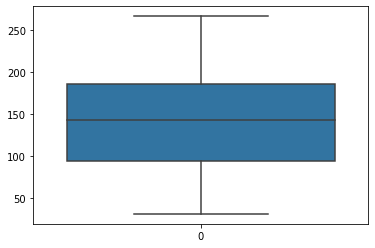

In [0]:
sns.boxplot(data=df1['Item_MRP'])

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[61]: <AxesSubplot:xlabel='Item_Outlet_Sales'>

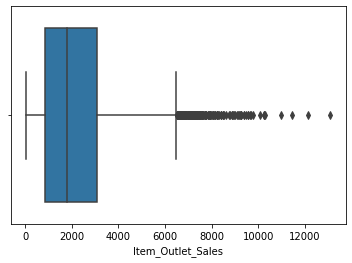

In [0]:
#AS YOU CAN SEE THERE ARE OUTLIERS IN THIS COLUMNS
sns.boxplot(df1['Item_Outlet_Sales'])
# BUT WE WILL NOT REMOVE THIS.BEACUSE OUTLET SALES CAN BE 12000 OR MORE IN SOME MONTHS.

In [3]:
def visualize_sales(column_name):
    result=df.groupby(column_name).sum()
    y=df[column_name].unique()
    plt.bar(y,result['Item_Outlet_Sales'])
    plt.xticks(y)
    labels,location=plt.yticks() 
    plt.yticks(labels, (labels/1000000).astype(int)) #Scating tn mébtton Use
    plt.ylabel("Sales in milion usd")
    plt.xlabel(column_name,)
    plt.show()


In [4]:
visualize_sales(column_name='Outlet_Establishment_Year')

NameError: name 'df' is not defined

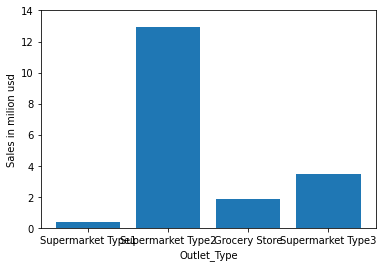

In [0]:
visualize_sales(column_name='Outlet_Type')

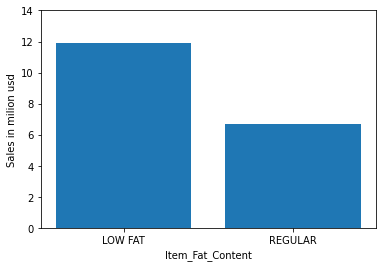

In [0]:
visualize_sales(column_name='Item_Fat_Content')

In [0]:
final_data=df1

In [0]:
final_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,LOW FAT,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,REGULAR,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.5,LOW FAT,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.2,REGULAR,0,Fruits and Vegetables,182.095,OUT010,1998,None,Tier 3,Grocery Store,732
4,NCD19,8.93,LOW FAT,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994


In [0]:
final_data['Item_Outlet_Sales']=final_data['Item_Outlet_Sales'].astype('float')

In [0]:
final_data['Item_Outlet_Sales']=final_data['Item_Outlet_Sales'].astype('int')

In [0]:
final_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,LOW FAT,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,REGULAR,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.5,LOW FAT,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.2,REGULAR,0,Fruits and Vegetables,182.095,OUT010,1998,None,Tier 3,Grocery Store,732
4,NCD19,8.93,LOW FAT,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994


In [0]:
final_data.columns

Out[71]: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## CONVERT CATEGORICAL INTO 0 OR 1

In [0]:
final_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,LOW FAT,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,REGULAR,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.5,LOW FAT,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.2,REGULAR,0,Fruits and Vegetables,182.095,OUT010,1998,None,Tier 3,Grocery Store,732
4,NCD19,8.93,LOW FAT,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LOW FAT,0.056783389,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778
8519,FDS36,8.38,REGULAR,0.046982429,Baking Goods,108.157,OUT045,2002,None,Tier 2,Supermarket Type1,549
8520,NCJ29,10.6,LOW FAT,0.035186271,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193
8521,FDN46,7.21,REGULAR,0.145220646,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845


**LABEL ENCODING**

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()

In [0]:
final_data=final_data.drop(columns=['Outlet_Size','Outlet_Location_Type'],axis=1)

In [0]:
final_data=final_data.drop(columns=['Item_Visibility'],axis=1)

In [0]:
final_data=final_data.drop(columns=['Item_Identifier','Outlet_Establishment_Year','Outlet_Establishment_Year'],axis=1) # FINAL DATA FRAME IN WHICH APPLYING ML


In [0]:
final_data=final_data.drop(columns=['Outlet_Identifier'])

In [0]:
final_data['Item_MRP']=final_data['Item_MRP'].astype('float64')
final_data['Item_MRP']=final_data['Item_MRP'].astype('int')



In [0]:
final_data['Item_Weight']=final_data['Item_MRP'].astype('float64')
final_data['Item_Weight']=final_data['Item_MRP'].astype('int')


In [0]:
final_data

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Type,Item_Outlet_Sales
0,249,LOW FAT,Dairy,249,Supermarket Type1,3735
1,48,REGULAR,Soft Drinks,48,Supermarket Type2,443
2,141,LOW FAT,Meat,141,Supermarket Type1,2097
3,182,REGULAR,Fruits and Vegetables,182,Grocery Store,732
4,53,LOW FAT,Household,53,Supermarket Type1,994
...,...,...,...,...,...,...
8518,214,LOW FAT,Snack Foods,214,Supermarket Type1,2778
8519,108,REGULAR,Baking Goods,108,Supermarket Type1,549
8520,85,LOW FAT,Health and Hygiene,85,Supermarket Type1,1193
8521,103,REGULAR,Snack Foods,103,Supermarket Type2,1845


In [0]:
final_data_Transform=final_data.apply(le.fit_transform)

In [0]:
final_data_Transform

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Type,Item_Outlet_Sales
0,210,0,4,210,1,2202
1,17,1,14,17,2,341
2,104,0,10,104,1,1393
3,145,1,6,145,0,553
4,22,0,9,22,1,720
...,...,...,...,...,...,...
8518,175,0,13,175,1,1758
8519,74,1,0,74,1,424
8520,51,0,8,51,1,859
8521,69,1,13,69,2,1237


In [0]:
import seaborn as sns


#STATISTICAL ANALYSIS

In [0]:
"""plt.figure(figsize=(20,10))
cor = final_data.corr().T
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()"""
final_data.corr().T


,Item_Weight,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,1.000000,0.567516
Item_MRP,1.000000,1.000000,0.567516
Item_Outlet_Sales,0.567516,0.567516,1.000000


In [0]:
final_data.mean()

<command-315102404729401>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_data.mean()
Out[86]: Item_Weight           140.494662
Item_MRP              140.494662
Item_Outlet_Sales    2180.786577
dtype: float64

In [0]:
final_data.std()

<command-315102404729402>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_data.std()
Out[87]: Item_Weight            62.275275
Item_MRP               62.275275
Item_Outlet_Sales    1706.497259
dtype: float64

In [0]:
final_data.min()

Out[88]: Item_Weight                     31
Item_Fat_Content           LOW FAT
Item_Type             Baking Goods
Item_MRP                        31
Outlet_Type          Grocery Store
Item_Outlet_Sales               33
dtype: object

In [0]:
# THE REASON WHY AM CONVERTING INTO SQL DATAFRAME AAIN BECAUSE SPARK ML DOES NOT WORK WITH PANDAS DATAFRAME.
spark_dff = sqlContext.createDataFrame(final_data_Transform)

In [0]:
spark_dff.show(5)

+-----------+----------------+---------+--------+-----------+-----------------+
|Item_Weight|Item_Fat_Content|Item_Type|Item_MRP|Outlet_Type|Item_Outlet_Sales|
+-----------+----------------+---------+--------+-----------+-----------------+
|        210|               0|        4|     210|          1|             2202|
|         17|               1|       14|      17|          2|              341|
|        104|               0|       10|     104|          1|             1393|
|        145|               1|        6|     145|          0|              553|
|         22|               0|        9|      22|          1|              720|
+-----------+----------------+---------+--------+-----------+-----------------+
only showing top 5 rows



#SPARK ML

In [0]:
from pyspark.ml.feature import VectorAssembler
# BEFORE USING SPARKML IT IS COMPULSORY TO CONVERT YOUR DATAFRAME INTO DENSE VECTOR. WITHOUT CONVERTING INTO DENSE VECTOR ALGORITHM WILL NOT WORK.
# DENSE VECTOR JUST CONVERT THAT COLUMNS INTO POINTS. THAT'S ALL


In [0]:
required_features=['Item_Weight', 'Item_MRP','Item_Fat_Content','Item_Type','Outlet_Type','Item_Outlet_Sales']
       

In [0]:
assembler = VectorAssembler(inputCols=required_features, outputCol='features')


In [0]:
transformed_data = assembler.transform(spark_dff)

In [0]:
transformed_data.show(5)

+-----------+----------------+---------+--------+-----------+-----------------+--------------------+
|Item_Weight|Item_Fat_Content|Item_Type|Item_MRP|Outlet_Type|Item_Outlet_Sales|            features|
+-----------+----------------+---------+--------+-----------+-----------------+--------------------+
|        210|               0|        4|     210|          1|             2202|[210.0,210.0,0.0,...|
|         17|               1|       14|      17|          2|              341|[17.0,17.0,1.0,14...|
|        104|               0|       10|     104|          1|             1393|[104.0,104.0,0.0,...|
|        145|               1|        6|     145|          0|              553|[145.0,145.0,1.0,...|
|         22|               0|        9|      22|          1|              720|[22.0,22.0,0.0,9....|
+-----------+----------------+---------+--------+-----------+-----------------+--------------------+
only showing top 5 rows



In [0]:
(training_data, test_data) = transformed_data.randomSplit([0.7,0.3])

In [0]:
from pyspark.ml.regression import LinearRegression


#LINEAR REGRESSION

In [0]:
Lr = LinearRegression(labelCol='Item_Outlet_Sales', 
                            featuresCol='features',maxIter=10)


In [0]:
model = Lr.fit(training_data)

In [0]:
predictions = model.transform(test_data)

In [0]:
predictions.select("features","prediction").show(5)

+--------------------+-----------------+
|            features|       prediction|
+--------------------+-----------------+
|[2.0,2.0,0.0,9.0,...|339.0000000000003|
|[2.0,2.0,0.0,12.0...|915.0000000000003|
|[3.0,3.0,1.0,13.0...|            586.0|
|[4.0,4.0,0.0,8.0,...|            557.0|
|[5.0,5.0,0.0,9.0,...|            315.0|
+--------------------+-----------------+
only showing top 5 rows



#DECISION TREE

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor


In [0]:
dt = DecisionTreeRegressor(featuresCol='features',labelCol='Item_Outlet_Sales')


In [0]:
modell=dt.fit(training_data)

In [0]:
pred=modell.transform(test_data)

In [0]:
pred.select('prediction','Item_Outlet_Sales').show(5)

+-----------------+-----------------+
|       prediction|Item_Outlet_Sales|
+-----------------+-----------------+
|366.0376344086022|              339|
|888.2994652406417|              915|
|546.9811320754717|              586|
|546.9811320754717|              557|
|276.6329787234043|              315|
+-----------------+-----------------+
only showing top 5 rows



In [0]:
#spark_dff.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("dbfs:/FileStore/model/clean_data.csv")

#RANDOM FOREST REGRESSOR

In [0]:
from pyspark.ml.regression import RandomForestRegressor

In [0]:
rc=RandomForestRegressor(featuresCol='features',labelCol='Item_Outlet_Sales',maxDepth=5)

In [0]:
r_model=rc.fit(training_data)

In [0]:
pre=r_model.transform(test_data)

In [0]:
pre.select('prediction','Item_Outlet_Sales').show(5)

+------------------+-----------------+
|        prediction|Item_Outlet_Sales|
+------------------+-----------------+
| 425.1537825140123|              339|
| 742.9014051874141|              915|
| 560.3556461801353|              586|
| 559.3517009482217|              557|
|420.49863935957535|              315|
+------------------+-----------------+
only showing top 5 rows



In [0]:
model.save("/taimoor/trainedmodels")

In [0]:
display(dbutils.fs.ls("/taimoor/trainedmodels/"))

path,name,size,modificationTime
dbfs:/taimoor/trainedmodels/data/,data/,0,0
dbfs:/taimoor/trainedmodels/metadata/,metadata/,0,0
